In [38]:
import os
import pickle
from collections import defaultdict
import platform
import sys
import io

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from garagei.envs.consistent_normalized_env import consistent_normalize
from iod.utils import get_normalizer_preset

sns.set_style("whitegrid")

if 'mac' in platform.platform():
    pass
else:
    os.environ['MUJOCO_GL'] = 'egl'
    if 'SLURM_STEP_GPUS' in os.environ:
        os.environ['EGL_DEVICE_ID'] = os.environ['SLURM_STEP_GPUS']

In [40]:
ANT_METRA_SUM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/ant_metra_sum_turn_off_dones_with_goal_metrics/sd000_s_21497671.0.1722112978_ant_metra',
    'anonymous-il-scale/metra-with-avalon/exp/ant_metra_sum_turn_off_dones_with_goal_metrics/sd001_s_21497672.0.1722112978_ant_metra',
    'anonymous-il-scale/metra-with-avalon/exp/ant_metra_sum_turn_off_dones_with_goal_metrics/sd002_s_21737075.0.1723674377_ant_metra',
    'anonymous-il-scale/metra-with-avalon/exp/ant_metra_sum_turn_off_dones_with_goal_metrics/sd003_s_21737076.0.1723674376_ant_metra',
    'anonymous-il-scale/metra-with-avalon/exp/ant_metra_sum_turn_off_dones_with_goal_metrics/sd004_s_21737077.0.1723674376_ant_metra',
]

ANT_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/ant_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_sweep/sd000_s_21567111.0.1722950266_ant_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/ant_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_sweep/sd001_s_21567112.0.1722950266_ant_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/ant_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_2/sd002_s_21989134.0.1724882684_ant_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/ant_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_2/sd003_s_21989135.0.1724882683_ant_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/ant_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_2/sd004_s_21989136.0.1724882683_ant_metra_sf'
]

ANT_DIAYN_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/ant_diayn_no_done/sd000_s_21744886.0.1723744180_ant_metra',
    'anonymous-il-scale/metra-with-avalon/exp/ant_diayn_no_done/sd001_s_21744887.0.1723744179_ant_metra',
    'anonymous-il-scale/metra-with-avalon/exp/ant_diayn_no_done/sd002_s_21983393.0.1724796218_ant_metra',
    'anonymous-il-scale/metra-with-avalon/exp/ant_diayn_no_done/sd003_s_21983394.0.1724796218_ant_metra',
    'anonymous-il-scale/metra-with-avalon/exp/ant_diayn_no_done/sd004_s_21983395.0.1724796218_ant_metra'
]

ANT_VISR = [
    'anonymous-il-scale/metra-with-avalon/exp/ant_visr/sd000_s_21988746.0.1724872711_ant_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/ant_visr/sd001_s_21988747.0.1724872711_ant_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/ant_visr/sd002_s_21989998.0.1724882737_ant_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/ant_visr/sd003_s_21989999.0.1724882737_ant_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/ant_visr/sd004_s_21990000.0.1724882737_ant_metra_sf',
]

CHEETAH_METRA_SUM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_metra_sum_no_done_with_goal_metrics/sd000_s_21625261.0.1723157129_half_cheetah_metra',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_metra_sum_no_done_with_goal_metrics/sd001_s_21625262.0.1723157129_half_cheetah_metra',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_metra_sum_no_done_with_goal_metrics/sd002_s_21737085.0.1723674577_half_cheetah_metra',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_metra_sum_no_done_with_goal_metrics/sd003_s_21737086.0.1723674591_half_cheetah_metra',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_metra_sum_no_done_with_goal_metrics/sd004_s_21737087.0.1723674591_half_cheetah_metra'
]

CHEETAH_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_cont_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_sweep/sd000_s_21625253.0.1723156995_half_cheetah_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_cont_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_sweep/sd001_s_21625254.0.1723156993_half_cheetah_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_cont_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_2/sd002_s_21989200.0.1724882737_half_cheetah_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_cont_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_2/sd003_s_21989201.0.1724882738_half_cheetah_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_cont_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_2/sd004_s_21989202.0.1724882737_half_cheetah_metra_sf'
]

CHEETAH_DIAYN_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_diayn_no_done/sd000_s_21744888.0.1723744179_half_cheetah_metra',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_diayn_no_done/sd001_s_21744889.0.1723744179_half_cheetah_metra',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_diayn_no_done/sd002_s_21983412.0.1724796671_half_cheetah_metra',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_diayn_no_done/sd003_s_21983413.0.1724796671_half_cheetah_metra',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_diayn_no_done/sd004_s_21983414.0.1724796671_half_cheetah_metra'
]

CHEETAH_VISR = [
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_visr/sd000_s_21988748.0.1724872821_half_cheetah_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_visr/sd001_s_21988749.0.1724872821_half_cheetah_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_visr/sd002_s_21990001.0.1724882864_half_cheetah_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_visr/sd003_s_21990002.0.1724882863_half_cheetah_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/cheetah_visr/sd004_s_21990003.0.1724882863_half_cheetah_metra_sf',
]

QUADRUPED_METRA_SUM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_metra_sum_with_goal_metrics_no_done/sd000_s_21497823.0.1722113111_dmc_quadruped_metra',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_metra_sum_with_goal_metrics_no_done/sd001_s_21497824.0.1722113111_dmc_quadruped_metra',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_metra_sum_with_goal_metrics_no_done/sd002_s_21737101.0.1723675020_dmc_quadruped_metra',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_metra_sum_with_goal_metrics_no_done/sd003_s_21737102.0.1723675020_dmc_quadruped_metra',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_metra_sum_with_goal_metrics_no_done/sd004_s_21737103.0.1723675020_dmc_quadruped_metra'
]

QUADRUPED_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_metra_sum_sf_td_energy_with_goal_metrics_no_done_lam_sweep/sd000_s_21595372.0.1723049191_dmc_quadruped_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_metra_sum_sf_td_energy_with_goal_metrics_no_done_lam_sweep/sd001_s_21595373.0.1723049191_dmc_quadruped_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_metra_sum_sf_td_energy_with_goal_metrics_no_done_lam_5_option_dim_4/sd002_s_21737108.0.1723675162_dmc_quadruped_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_metra_sum_sf_td_energy_with_goal_metrics_no_done_lam_5_option_dim_4/sd003_s_21737109.0.1723675162_dmc_quadruped_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_metra_sum_sf_td_energy_with_goal_metrics_no_done_lam_5_option_dim_4/sd004_s_21737110.0.1723675162_dmc_quadruped_metra_sf'
]

QUADRUPED_DIAYN_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_diayn_no_done/sd000_s_21744892.0.1723762165_dmc_quadruped_metra',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_diayn_no_done/sd001_s_21744893.0.1723762164_dmc_quadruped_metra',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_diayn_no_done/sd002_s_21983451.0.1724796576_dmc_quadruped_metra',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_diayn_no_done/sd003_s_21983452.0.1724796576_dmc_quadruped_metra',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_diayn_no_done/sd004_s_21983453.0.1724796576_dmc_quadruped_metra'
]

QUADRUPED_VISR = [
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_visr/sd000_s_21988761.0.1724883020_dmc_quadruped_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_visr/sd001_s_21988762.0.1724883020_dmc_quadruped_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_visr/sd002_s_21990024.0.1724883102_dmc_quadruped_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_visr/sd003_s_21990025.0.1724883102_dmc_quadruped_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/quadruped_visr/sd004_s_21990026.0.1724884360_dmc_quadruped_metra_sf',
]

HUMANOID_METRA_SUM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_metra_sum_no_done_with_goal_metrics/sd000_s_21500598.0.1722126378_dmc_humanoid_metra',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_metra_sum_no_done_with_goal_metrics/sd001_s_21500599.0.1722126378_dmc_humanoid_metra',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_metra_sum_no_done_with_goal_metrics/sd002_s_21737187.0.1723677005_dmc_humanoid_metra',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_metra_sum_no_done_with_goal_metrics/sd003_s_21737188.0.1723762164_dmc_humanoid_metra',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_metra_sum_no_done_with_goal_metrics/sd004_s_21737189.0.1723762164_dmc_humanoid_metra'
]

HUMANOID_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_sweep/sd000_s_21646159.0.1723330684_dmc_humanoid_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_sweep/sd001_s_21646160.0.1723330684_dmc_humanoid_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_8/sd002_s_21737156.0.1723675597_dmc_humanoid_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_8/sd003_s_21737157.0.1723675605_dmc_humanoid_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_8/sd004_s_21737158.0.1723675605_dmc_humanoid_metra_sf'
]

HUMANOID_DIAYN_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_diayn_no_done/sd000_s_21744890.0.1723762165_dmc_humanoid_metra',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_diayn_no_done/sd001_s_21744891.0.1723762164_dmc_humanoid_metra',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_diayn_no_done/sd002_s_21983457.0.1724796628_dmc_humanoid_metra',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_diayn_no_done/sd003_s_21983458.0.1724796635_dmc_humanoid_metra',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_diayn_no_done/sd004_s_21983459.0.1724796635_dmc_humanoid_metra'
]

HUMANOID_VISR = [
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_visr/sd000_s_21988763.0.1724883019_dmc_humanoid_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_visr/sd001_s_21988764.0.1724883019_dmc_humanoid_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_visr/sd002_s_21990038.0.1724884360_dmc_humanoid_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_visr/sd003_s_21990039.0.1724884360_dmc_humanoid_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/humanoid_visr/sd004_s_21990040.0.1724884360_dmc_humanoid_metra_sf',
]

KITCHEN_METRA_SUM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/kitchen_metra_sum_no_done_with_goal_metrics/sd000_s_21983615.0.1724883020_kitchen_metra',
    'anonymous-il-scale/metra-with-avalon/exp/kitchen_metra_sum_no_done_with_goal_metrics/sd001_s_21983616.0.1724883020_kitchen_metra',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_metra_sum_no_done_with_goal_metrics/sd002_s_21948564.0.1724528083_kitchen_metra',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_metra_sum_no_done_with_goal_metrics/sd003_s_21948565.0.1724528083_kitchen_metra',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_metra_sum_no_done_with_goal_metrics/sd004_s_21948566.0.1724528083_kitchen_metra',
]

KITCHEN_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/kitchen_cont_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_4/sd000_s_21983604.0.1724883020_kitchen_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/kitchen_cont_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_4/sd001_s_21983605.0.1724883019_kitchen_metra_sf',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_cont_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_4/sd002_s_21948561.0.1724528044_kitchen_metra_sf',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_cont_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_4/sd003_s_21948562.0.1724528044_kitchen_metra_sf',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_cont_metra_sum_sf_td_energy_no_done_with_goal_metrics_lam_5_option_dim_4/sd004_s_21948563.0.1724528044_kitchen_metra_sf',
]

KITCHEN_DIAYN_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/kitchen_diayn_no_done/sd000_s_21948559.0.1724528022_kitchen_metra',
    'anonymous-il-scale/metra-with-avalon/exp/kitchen_diayn_no_done/sd001_s_21948560.0.1724528022_kitchen_metra',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_diayn_no_done/sd002_s_21983601.0.1724797950_kitchen_metra',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_diayn_no_done/sd003_s_21983602.0.1724797950_kitchen_metra',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_diayn_no_done/sd004_s_21983603.0.1724797950_kitchen_metra'
]

KITCHEN_VISR = [
    'anonymous-il-scale/metra-with-avalon/exp/kitchen_visr/sd000_s_21988765.0.1724883020_kitchen_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/kitchen_visr/sd001_s_21988766.0.1724883072_kitchen_metra_sf',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_visr/sd002_s_21990042.0.1724884360_kitchen_metra_sf',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_visr/sd003_s_21990043.0.1724884418_kitchen_metra_sf',
    # 'anonymous-il-scale/metra-with-avalon/exp/kitchen_visr/sd004_s_21990044.0.1724884418_kitchen_metra_sf',
]

ROBOBIN_METRA_SUM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/robobin_metra_sum_with_goal_metrics_no_done/sd000_s_21956211.0.1724615917_robobin_image_metra',
    'anonymous-il-scale/metra-with-avalon/exp/robobin_metra_sum_with_goal_metrics_no_done/sd001_s_21956212.0.1724615917_robobin_image_metra',
]

ROBOBIN_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/robobin_metra_sum_sf_td_energy_lam_5_dim_9_with_goal_metrics_no_done/sd000_s_21956213.0.1724615934_robobin_image_metra_sf',
    'anonymous-il-scale/metra-with-avalon/exp/robobin_metra_sum_sf_td_energy_lam_5_dim_9_with_goal_metrics_no_done/sd001_s_21956214.0.1724615934_robobin_image_metra_sf',
]

ROBOBIN_DIAYN_NO_DONE = [
    'anonymous-il-scale/metra-with-avalon/exp/robobin_diayn/sd000_s_21956203.0.1724615792_robobin_image_metra',
    'anonymous-il-scale/metra-with-avalon/exp/robobin_diayn/sd001_s_21956204.0.1724615792_robobin_image_metra'
]


ANT_FOLDER_MAP = {
    # ant
    'CSF': ANT_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE,
    'METRA': ANT_METRA_SUM_NO_DONE,
    'DIAYN': ANT_DIAYN_NO_DONE,
    'VISR': ANT_VISR,
}

HALF_CHEETAH_FOLDER_MAP = {
    # cheetah
    'CSF': CHEETAH_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE,
    'METRA': CHEETAH_METRA_SUM_NO_DONE,
    'DIAYN': CHEETAH_DIAYN_NO_DONE,
    'VISR': CHEETAH_VISR,
}

QUADRUPED_FOLDER_MAP = {
    # quadruped
    'CSF': QUADRUPED_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE,
    'METRA': QUADRUPED_METRA_SUM_NO_DONE,
    'DIAYN': QUADRUPED_DIAYN_NO_DONE,
    'VISR': QUADRUPED_VISR,
}

HUMANOID_FOLDER_MAP = {
    # humanoid
    'CSF': HUMANOID_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE,
    'METRA': HUMANOID_METRA_SUM_NO_DONE,
    'DIAYN': HUMANOID_DIAYN_NO_DONE,
    'VISR': HUMANOID_VISR,
}

KITCHEN_FOLDER_MAP = {
    # kitchen
    'CSF': KITCHEN_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE,
    'METRA': KITCHEN_METRA_SUM_NO_DONE,
    'DIAYN': KITCHEN_DIAYN_NO_DONE,
    'VISR': KITCHEN_VISR,
}

ROBOBIN_FOLDER_MAP = {
    # robobin
    'CSF': ROBOBIN_METRA_SUM_NO_DONE,
    'METRA': ROBOBIN_METRA_SUM_SF_TD_ENERGY_BEST_LAM_OPTION_DIM_NO_DONE,
    'DIAYN': ROBOBIN_DIAYN_NO_DONE,
}

ENV_MAP = {
    'Ant (States)': ANT_FOLDER_MAP, 
    'HalfCheetah (States)': HALF_CHEETAH_FOLDER_MAP,
    'Quadruped (Pixels)': QUADRUPED_FOLDER_MAP, 
    'Humanoid (Pixels)': HUMANOID_FOLDER_MAP,
    'Kitchen (Pixels)': KITCHEN_FOLDER_MAP,
    'Robobin (Pixels)': ROBOBIN_FOLDER_MAP,
}

COLOR_MAP = {
    'CSF': sns.color_palette()[0],
    'METRA': sns.color_palette()[1],
    'DIAYN': sns.color_palette()[2],
    'DADS': sns.color_palette()[3],
    'CIC': sns.color_palette()[4],
    'VISR': sns.color_palette()[5],
}

CHKPT_TO_ENV_STEPS = {
    1000: 1.6e+06,
    2000: 3.2e+06,
    3000: 4.8e+06,
    5000: 8e+06,
    10_000: 1.6e+07,
    20_000: 3.2e+07,
    40_000: 6.4e+07,
}

In [41]:
NUM_GOALS = 200
MAX_PATH_LENGTH = None
EVAL_METRIC = 'AtSuccess3'

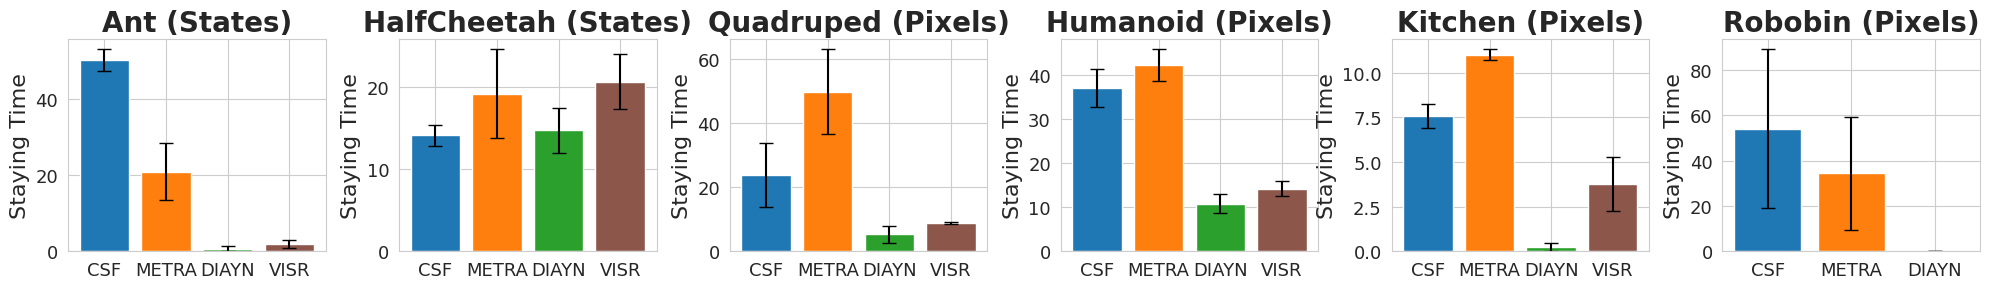

In [42]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 6, figsize=(20, 3))

for ax, (title, ENV_FOLDER_MAPS) in zip(axes, ENV_MAP.items()):
    bar_xs = []
    bar_ys = []
    bar_stds = []

    for label, method_folders in ENV_FOLDER_MAPS.items():

        all_seed_ys = []
        min_length = float('inf')

        for seed_folder in method_folders:
            # with open(os.path.join(seed_folder, 'params.pkl'), 'rb') as f:
            #     data = pickle.load(f)

#             data = SEED_FOLDER_TO_DATA[seed_folder]

#             cfg = data['algo']
#             mpl = MAX_PATH_LENGTH or cfg.max_path_length

            if MAX_PATH_LENGTH is None:
                if 'Kitchen' in title:
                    mpl = 50
                else:
                    mpl = 200
            else:
                with open(os.path.join(seed_folder, 'params.pkl'), 'rb') as f:
                    data = pickle.load(f)

                cfg = data['algo']
                mpl = MAX_PATH_LENGTH or cfg.max_path_length

            # load results
            goal_metrics_file = os.path.join(seed_folder, f'goal_metrics_num_goals_{NUM_GOALS}_mpl_{mpl}.pkl')
            if os.path.exists(goal_metrics_file):
                with open(goal_metrics_file, 'rb') as f:
                    chkpt_to_goal_metrics = pickle.load(f)

            # plot
            xs = list(chkpt_to_goal_metrics.keys())
            if 'Kitchen' in list(chkpt_to_goal_metrics[xs[0]].keys())[0]:
                if label == 'METRA':
                    ys = [chkpt_to_goal_metrics[x]['KitchenSingleGoalStayingTimeOverall'] for x in xs]
                else:
                    ys = [chkpt_to_goal_metrics[x]['KitchenGoalStayingTimeOverall'] for x in xs]
            elif 'Robobin' in list(chkpt_to_goal_metrics[xs[0]].keys())[0]:
                ys = [chkpt_to_goal_metrics[x]['RobobinGoalStayingTimeOverall'] for x in xs]
            elif 'cheetah' in goal_metrics_file and label == 'METRA':
                ys = [chkpt_to_goal_metrics[x][f'{EVAL_METRIC}Adaptive'] for x in xs]
            else:
                ys = [chkpt_to_goal_metrics[x][f'{EVAL_METRIC}'] for x in xs]
            all_seed_ys.append(ys)

            if len(xs) < min_length:
                min_length = len(xs)

        truncated_values = [values[:min_length] for values in all_seed_ys]
        truncated_values = np.array(truncated_values)

        mean_values = np.mean(truncated_values, axis=0)
        std_dev = np.std(truncated_values, axis=0)

        xs = [CHKPT_TO_ENV_STEPS[x] for x in xs]

        if len(xs) > 1:
            ax.plot(xs, mean_values, label=label)
            ax.fill_between(xs, mean_values - std_dev, mean_values + std_dev, alpha=0.2)
            ax.set_xlabel('Environment Steps')
            ax.set_ylabel(EVAL_METRIC)
            ax.set_title(title)
        else:
            bar_xs.append(label)
            bar_ys.append(mean_values[0])
            bar_stds.append(std_dev[0])

    if len(xs) == 1:
        ax.bar(bar_xs, bar_ys, color=[COLOR_MAP[_label] for _label in bar_xs], yerr=bar_stds, capsize=5)
        ax.set_ylabel('Staying Time', fontsize=16)
        ax.set_title(title, fontsize="20", fontweight="bold")
#         ax.set_xticklabels(bar_xs, rotation=45, ha='center', fontsize=13)
        ax.tick_params(axis='x', labelsize=13)
        ax.tick_params(axis='y', labelsize=13)

if not len(xs) == 1:
    plt.legend(frameon=True, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust the plot area to make space for the legend
else:
    plt.tight_layout()
plt.savefig(f'../../figures/paper/post_goal_reaching_{mpl}_{EVAL_METRIC}.pdf', bbox_inches='tight')
plt.show()

In [37]:
xlim and ylim start at 0
remove y labels on columns 2 and 3
truncate graphs to ~equal lengths
check if colors are good for colorblind friendly (check seaborn color palette designed to be this)
check most common types of colorblindness, and adjust colorpalette accordingly (e.g. https://pilestone.com/pages/color-blindness-simulator-1?srsltid=AfmBOooc219IsOLaOfV9wMErqylRZxidNfaQTAOklzV_MlPEzctMLFCq)
if that doesn't work, use symbols - check marker spacing option

goal reaching:
- make into one big bar plot where x axis is env, legend indicates method

SyntaxError: invalid syntax (3059239789.py, line 1)